In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('car_train.csv')

In [3]:
df.head(5)

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,2,Subaru,Impreza,134944.0,Manual,2009
1,3,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,3,Subaru,Impreza,33304.0,Automatic,2014
2,4,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,6,Subaru,Impreza,81668.0,Manual,2007
3,5,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,8,Subaru,Impreza,48051.0,Automatic,2009
4,6,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,3,Subaru,Impreza,51516.0,Manual,2011


In [4]:
df['acquisition_date'] = pd.to_datetime(df['acquisition_date']) # this converts the acquisition_date from string to datetime
#df.acquisition_date.str.replace('-','').astype(float)
#df['acquisition_date'] = pd.to_datetime(df.acquisition_date)
#df.year = df['acquisition_date'].dt.year

In [5]:
df.head()

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,2,Subaru,Impreza,134944.0,Manual,2009
1,3,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,3,Subaru,Impreza,33304.0,Automatic,2014
2,4,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,6,Subaru,Impreza,81668.0,Manual,2007
3,5,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,8,Subaru,Impreza,48051.0,Automatic,2009
4,6,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,3,Subaru,Impreza,51516.0,Manual,2011


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38506 entries, 0 to 38505
Data columns (total 18 columns):
rownum              38506 non-null int64
price               38503 non-null float64
acquisition_date    38506 non-null datetime64[ns]
badge               36933 non-null object
body_type           38504 non-null object
category            36018 non-null object
colour              36545 non-null object
cylinders           36018 non-null float64
economy             34586 non-null float64
fuel                38478 non-null object
last_updated        38506 non-null object
litres              36018 non-null float64
location            38506 non-null int64
make                38506 non-null object
model               38506 non-null object
odometer            36956 non-null float64
transmission        38499 non-null object
year                38506 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(9)
memory usage: 5.3+ MB


In [7]:
df.dtypes

rownum                       int64
price                      float64
acquisition_date    datetime64[ns]
badge                       object
body_type                   object
category                    object
colour                      object
cylinders                  float64
economy                    float64
fuel                        object
last_updated                object
litres                     float64
location                     int64
make                        object
model                       object
odometer                   float64
transmission                object
year                         int64
dtype: object

In [8]:
df.describe()

,rownum,price,cylinders,economy,litres,location,odometer,year
count,38506.000000,3.850300e+04,36018.000000,34586.000000,36018.000000,38506.000000,3.695600e+04,38506.000000
mean,26760.477796,2.217048e+04,4.014493,8.462942,2.285010,4.004415,9.192221e+04,2011.749078
std,15439.829358,6.546887e+04,0.169636,1.284251,0.257235,2.438988,7.870537e+04,4.719086
min,0.000000,3.300000e+01,4.000000,5.600000,1.600000,1.000000,0.000000e+00,1993.000000
25%,13413.250000,1.204500e+04,4.000000,7.400000,2.000000,2.000000,2.895100e+04,2009.000000
50%,26765.000000,2.106500e+04,4.000000,8.500000,2.400000,3.000000,8.206000e+04,2013.000000
75%,40115.750000,2.959500e+04,4.000000,9.500000,2.500000,6.000000,1.409460e+05,2016.000000
max,53459.000000,1.234576e+07,6.000000,11.600000,3.500000,9.000000,4.265814e+06,2018.000000


In [9]:
df.isna().sum()

rownum                 0
price                  3
acquisition_date       0
badge               1573
body_type              2
category            2488
colour              1961
cylinders           2488
economy             3920
fuel                  28
last_updated           0
litres              2488
location               0
make                   0
model                  0
odometer            1550
transmission           7
year                   0
dtype: int64

In [10]:
df.location.shape

(38506,)

In [11]:
df.corr()['price'].sort_values(ascending = False ) # calculating the correlation between the features

price        1.000000
year         0.128069
litres       0.033605
location     0.026900
rownum       0.005291
cylinders   -0.049754
odometer    -0.132322
economy     -0.421576
Name: price, dtype: float64

In [12]:
df.price.min()

33.0

In [13]:
df.price.max()

12345760.0

In [14]:
df.make.value_counts().sum() # counting the number of cars

38506

In [15]:
df.year.value_counts()

2017    7467
2013    3492
2014    3152
2016    3077
2010    2373
2012    2331
2011    2121
2009    2102
2008    1976
2015    1975
2006    1621
2007    1471
2005    1043
2004     948
2018     817
2003     808
2002     630
2001     492
2000     356
1999     106
1998      58
1997      48
1994      18
1996      15
1995       8
1993       1
Name: year, dtype: int64

In [16]:
# most recent year
df.year.max()

2018

In [17]:
# the oldest car was made in 1993
df.year.min()

1993

In [18]:
df.colour.value_counts() # getting the colours with their values

White            9649
Silver           8188
Grey             5669
Blue             4482
Black            3888
Red              2329
Green             469
Gold              449
Ebony             285
Graphite          265
Crystal Pearl     236
Orange            130
Wildfire          116
Burgundy           85
Ink                74
Other              72
Brown              51
Purple             26
Beige              23
Yellow             21
Inferno            12
Sandstone          10
Metal Storm         4
Deep Cherry         3
Hazel               2
Magenta             2
Envy                2
Dune                1
Glacier             1
/cloth              1
Name: colour, dtype: int64

In [19]:
df.transmission.value_counts()

Automatic    27846
Manual       10653
Name: transmission, dtype: int64

In [20]:
df.category.value_counts()

Used       17364
Private    11417
Other       4037
Demo        1686
Other2      1514
Name: category, dtype: int64

In [21]:
#this gets the highest price of the car and count down
car_price_highest = df.sort_values('price',ascending=False).head(7)

In [22]:
#this gets the lowest price of the car and count down
car_price_lowest = df.sort_values('price',ascending=True).head(7) 

In [23]:
# finding the correlation between the features by ploting the headt map
df_corr = df.select_dtypes(include=[np.number])
del df_corr['price']

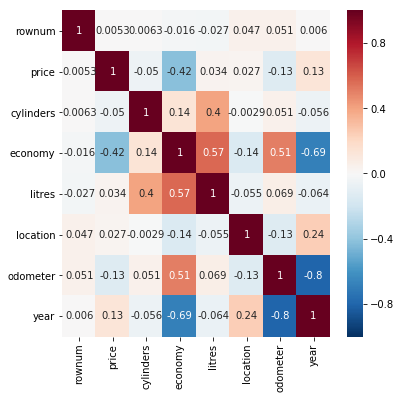

In [24]:
correlation = df.corr()
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.savefig('/Users/rizka/Desktop/my_new_figure2')

In [25]:
corrmat = df.corr()

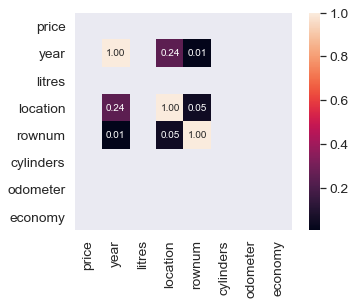

<Figure size 432x288 with 0 Axes>

In [26]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('/Users/rizka/Desktop/my_new_figure2')

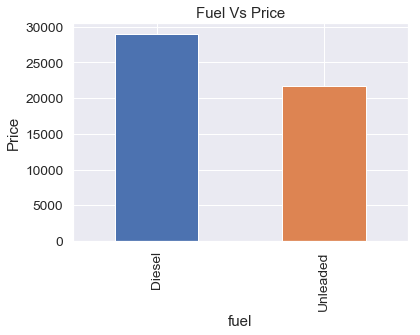

In [27]:
# this is to see the ratio of fuel type against the price
var = df.groupby('fuel').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Fuel')
ax1.set_ylabel('Price')
ax1.set_title("Fuel Vs Price")
var.plot(kind='bar')

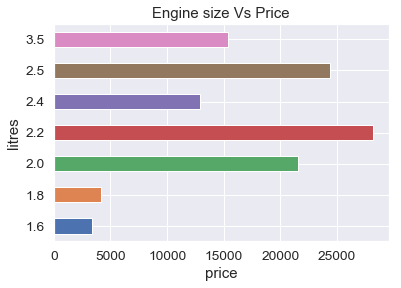

In [28]:
var = df.groupby('litres').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('price')
ax1.set_ylabel('litres')
ax1.set_title("Engine size Vs Price")
var.plot(kind='barh')

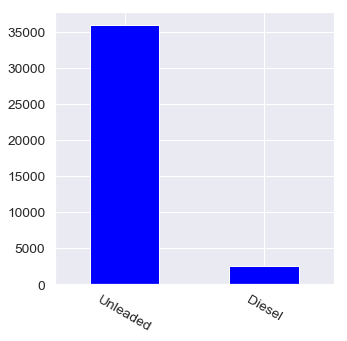

In [29]:
# this is to see the ratio of fuel types between diesel and unleaded
df['fuel'].value_counts().plot(kind='bar',figsize=(5,5),rot=-30,color='blue')

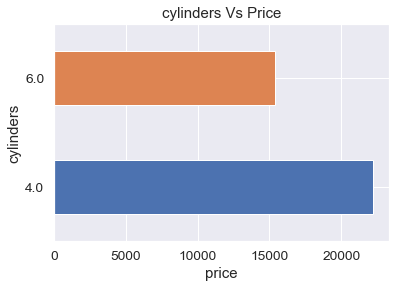

In [30]:
# this is to see how different categories of the cars are effected with price
var = df.groupby('cylinders').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('price')
ax1.set_ylabel('cylinders')
ax1.set_title("cylinders Vs Price")
var.plot(kind='barh')

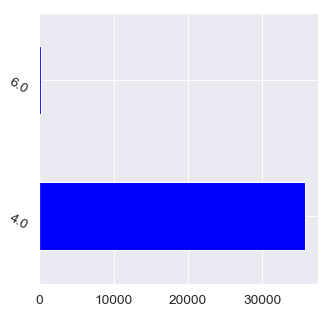

In [31]:
df['cylinders'].value_counts().plot(kind='barh',figsize=(5,5),rot=-30,color='blue')

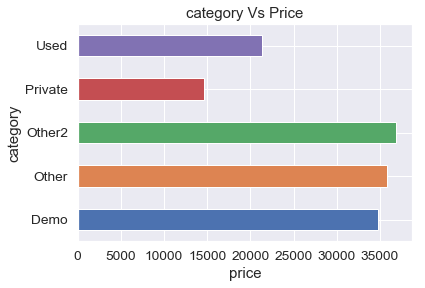

In [32]:
# this is to see how different categories of the cars are effected with price
var = df.groupby('category').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('price')
ax1.set_ylabel('category')
ax1.set_title("category Vs Price")
var.plot(kind='barh')

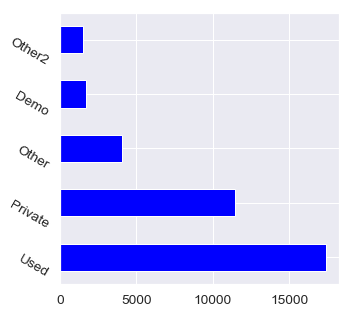

In [33]:
df['category'].value_counts().plot(kind='barh',figsize=(5,5),rot=-30,color='blue')

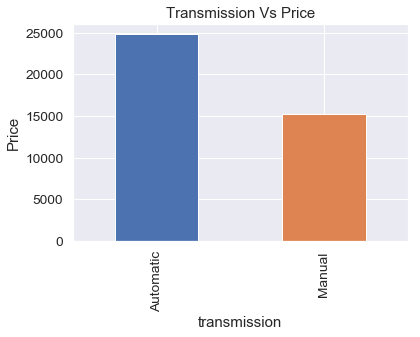

In [34]:
# this is to see the  transmission effects on the price
var = df.groupby('transmission').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Transmission')
ax1.set_ylabel('Price')
ax1.set_title("Transmission Vs Price")
var.plot(kind='bar')

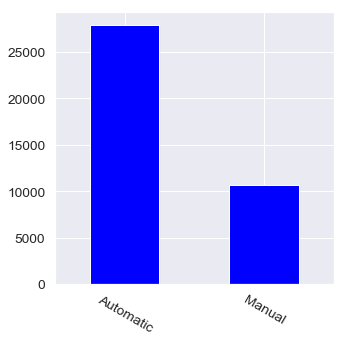

In [35]:
df['transmission'].value_counts().plot(kind='bar',figsize=(5,5),rot=-30,color='blue')

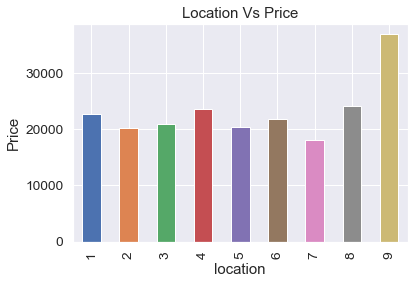

In [36]:
var = df.groupby('location').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('location')
ax1.set_ylabel('Price')
ax1.set_title("Location Vs Price")
var.plot(kind='bar')

In [37]:
# this filtering some colours and creating a new data frame called colour1
colour1 = df[df.colour.isin(['White','Blue','Silver','Grey ','Black ','Red', 'Green','Gold']) ] # this is to filter the colours that have highest number


In [38]:
# effect of the colour on the price
var = colour1.groupby('colour').price.mean() 

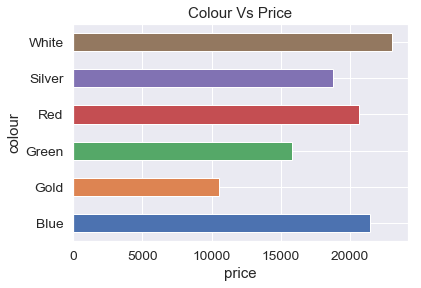

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('price')
ax1.set_ylabel('price')
ax1.set_title("Colour Vs Price")
var.plot(kind='barh')

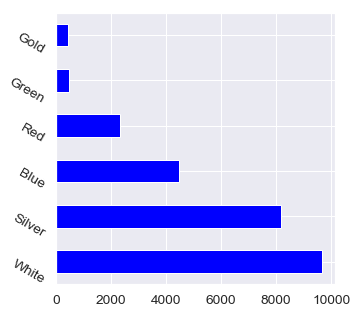

In [40]:
colour1['colour'].value_counts().plot(kind='barH',figsize=(5,5),rot=-30,color='blue')

No handles with labels found to put in legend.


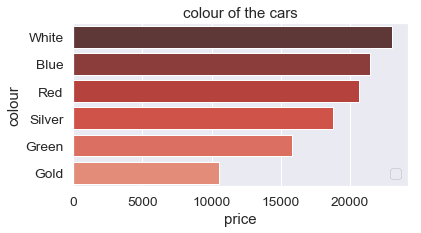

In [41]:
var_agric_reg = colour1.groupby('colour')['price'].mean()
var_agric_reg = var_agric_reg.sort_values( ascending=False)
plt.figure(figsize = (6,3))
sns.barplot(x=var_agric_reg, y=var_agric_reg.index, palette="Reds_d")
plt.xlabel('price')
plt.ylabel('colour')
plt.title('colour of the cars')
plt.legend()

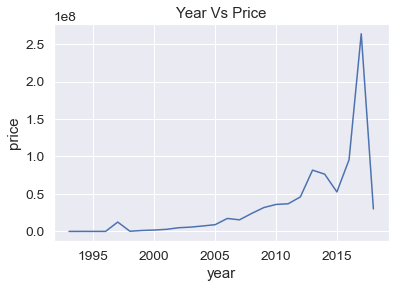

In [42]:
# finding the effect of the year on the price
var = df.groupby('year').price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Condition Of Car')
ax1.set_ylabel('price')
ax1.set_title("Year Vs Price")
var.plot(kind='line')

In [43]:
avg_year = df["year"].astype("float").mean(axis = 0)
print("Average of Year:", avg_year)
df["year"].replace(np.nan, avg_year, inplace = True)

Average of Year: 2011.749078065756


In [44]:
# this calculates the average mileage on each car
avg_odometer = df["odometer"].astype("float").mean(axis = 0)
print("Average of odometer:", avg_odometer)
df["odometer"].replace(np.nan, avg_odometer, inplace = True)

Average of odometer: 91922.20527113324


In [45]:
# this calculates the maximum mileage on each car
max_odometer = df["odometer"].astype("float").max(axis = 0)
print("maximum of odometer:", max_odometer)
df["odometer"].replace(np.nan, max_odometer, inplace = True)

maximum of odometer: 4265814.0


In [46]:
df.head()

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,2,Subaru,Impreza,134944.0,Manual,2009
1,3,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,3,Subaru,Impreza,33304.0,Automatic,2014
2,4,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,6,Subaru,Impreza,81668.0,Manual,2007
3,5,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,8,Subaru,Impreza,48051.0,Automatic,2009
4,6,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,3,Subaru,Impreza,51516.0,Manual,2011


In [47]:
df.drop(df.loc[df['odometer']==df['odometer'].max()].index, inplace=True)

In [48]:
df.drop(df.loc[df['odometer'] >=300000].index, inplace=True)

In [49]:
# this calculates the minimum mileage on each car
min_odometer = df["odometer"].astype("float").min(axis = 0)
print("minimum of odometer:", min_odometer)
df["odometer"].replace(np.nan, min_odometer, inplace = True)

minimum of odometer: 0.0


In [50]:
mileage=df[df.odometer < 200000]

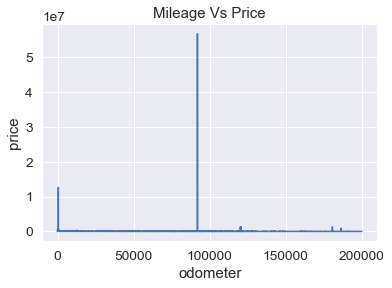

In [51]:
# finding the effect of the odometer on the price
var = mileage.groupby('odometer').price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Mileage')
ax1.set_ylabel('price')
ax1.set_title("Mileage Vs Price")
var.plot(kind='line')

In [52]:
var.head()

odometer
0.0     70566.0
1.0     73024.0
2.0     34344.0
3.0    176523.0
4.0    166404.0
Name: price, dtype: float64

In [53]:
pd.options.display.float_format = '{:20,.2f}'.format

In [54]:
df.price

0                   8,560.00
1                  17,074.00
2                   8,526.00
3                  10,952.00
4                  33,964.00
5                  18,070.00
6                  12,019.00
7                  10,860.00
8                  12,997.00
9                  30,216.00
10                 30,013.00
11                 30,277.00
12                 26,599.00
13                 30,082.00
14                 25,226.00
15                 22,958.00
16                 14,528.00
17                 10,080.00
18                 28,741.00
19                 25,084.00
20                 22,073.00
21                 16,022.00
22                 11,023.00
23                 21,612.00
24                 30,042.00
25                 21,990.00
26                 17,888.00
27                 18,509.00
28                 19,046.00
29                 15,043.00
                ...         
38476               9,900.00
38477              38,585.00
38478              33,567.00
38479         

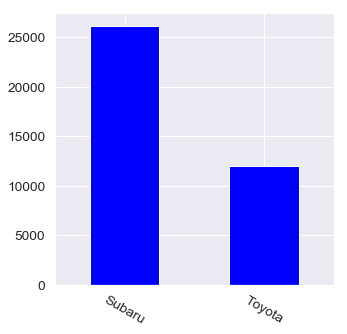

In [55]:
df['make'].value_counts().plot(kind='bar',figsize=(5,5),rot=-30,color='blue')

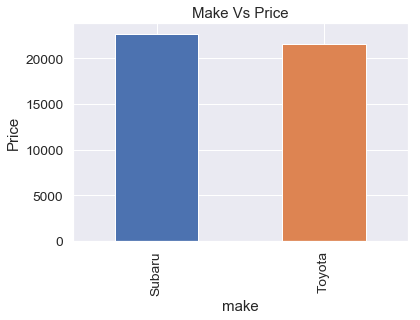

In [56]:
var = df.groupby('make').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('make')
ax1.set_ylabel('Price')
ax1.set_title("Make Vs Price")
var.plot(kind='bar')

# filling in the missing values

In [57]:
df

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,"8,560.00",2017-06-22,RS,Hatch,Used,Silver,4.00,8.90,Unleaded,2017-06-22,2.00,2,Subaru,Impreza,"134,944.00",Manual,2009
1,3,"17,074.00",2017-06-22,2.0i,Hatch,Used,Silver,4.00,6.80,Unleaded,2017-06-22,2.00,3,Subaru,Impreza,"33,304.00",Automatic,2014
2,4,"8,526.00",2017-06-22,R,Hatch,Used,Blue,4.00,8.90,Unleaded,2017-06-22,2.00,6,Subaru,Impreza,"81,668.00",Manual,2007
3,5,"10,952.00",2017-06-22,R,Hatch,Used,Black,4.00,8.80,Unleaded,2017-06-22,2.00,8,Subaru,Impreza,"48,051.00",Automatic,2009
4,6,"33,964.00",2017-06-22,WRX STI,Sedan,Used,Grey,4.00,10.50,Unleaded,2017-06-22,2.50,3,Subaru,Impreza,"51,516.00",Manual,2011
5,8,"18,070.00",2017-06-22,2.0i-S,Hatch,Used,Black,4.00,6.80,Unleaded,2017-06-22,2.00,7,Subaru,Impreza,"60,294.00",Automatic,2012
6,9,"12,019.00",2017-06-22,RS,Sedan,Used,Grey,4.00,8.90,Unleaded,2017-06-22,2.00,3,Subaru,Impreza,"96,160.00",Manual,2009
7,10,"10,860.00",2017-06-22,R,Sedan,Private,Red,4.00,8.80,Unleaded,2017-06-22,2.00,2,Subaru,Impreza,"103,380.00",Automatic,2011
8,11,"12,997.00",2017-06-22,RS,Sedan,Used,Silver,4.00,8.90,Unleaded,2017-06-22,2.00,2,Subaru,Impreza,"88,631.00",Manual,2008
9,12,"30,216.00",2017-06-22,2.0i Premium,Hatch,Other,Red,4.00,6.60,Unleaded,2017-06-22,2.00,1,Subaru,Impreza,213.00,Automatic,2017


In [58]:
numerical_cols = ['price','cylinders','economy','litres','location','odometer']
for col in numerical_cols:
    df[col][df[col].isna()] = df[col].mean()

C:\Users\rizka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# this is fillin the categorical columns with the mode value
categorical_cols = ['acquisition_date','badge','body_type','category','colour','fuel','last_updated','make','make','model','transmission','year']
for col in categorical_cols:
    df[col][df[col].isna()] = df[col].mode()[0]

C:\Users\rizka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [60]:
# droping the column rownum
df.drop(columns=['rownum'],inplace=True)

In [61]:
df.head()

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,"8,560.00",2017-06-22,RS,Hatch,Used,Silver,4.00,8.90,Unleaded,2017-06-22,2.00,2,Subaru,Impreza,"134,944.00",Manual,2009
1,"17,074.00",2017-06-22,2.0i,Hatch,Used,Silver,4.00,6.80,Unleaded,2017-06-22,2.00,3,Subaru,Impreza,"33,304.00",Automatic,2014
2,"8,526.00",2017-06-22,R,Hatch,Used,Blue,4.00,8.90,Unleaded,2017-06-22,2.00,6,Subaru,Impreza,"81,668.00",Manual,2007
3,"10,952.00",2017-06-22,R,Hatch,Used,Black,4.00,8.80,Unleaded,2017-06-22,2.00,8,Subaru,Impreza,"48,051.00",Automatic,2009
4,"33,964.00",2017-06-22,WRX STI,Sedan,Used,Grey,4.00,10.50,Unleaded,2017-06-22,2.50,3,Subaru,Impreza,"51,516.00",Manual,2011


In [62]:
df.drop(columns=['acquisition_date'],inplace=True)

In [63]:
df.head()

,price,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,"8,560.00",RS,Hatch,Used,Silver,4.00,8.90,Unleaded,2017-06-22,2.00,2,Subaru,Impreza,"134,944.00",Manual,2009
1,"17,074.00",2.0i,Hatch,Used,Silver,4.00,6.80,Unleaded,2017-06-22,2.00,3,Subaru,Impreza,"33,304.00",Automatic,2014
2,"8,526.00",R,Hatch,Used,Blue,4.00,8.90,Unleaded,2017-06-22,2.00,6,Subaru,Impreza,"81,668.00",Manual,2007
3,"10,952.00",R,Hatch,Used,Black,4.00,8.80,Unleaded,2017-06-22,2.00,8,Subaru,Impreza,"48,051.00",Automatic,2009
4,"33,964.00",WRX STI,Sedan,Used,Grey,4.00,10.50,Unleaded,2017-06-22,2.50,3,Subaru,Impreza,"51,516.00",Manual,2011


In [64]:
df1 = pd.get_dummies(df)

In [65]:
df1.head()

,price,cylinders,economy,litres,location,odometer,year,badge_(4x4),badge_(No Badge),badge_2.0D,...,last_updated_2018-03-04,last_updated_2018-03-05,last_updated_2018-03-09,make_Subaru,make_Toyota,model_Forester,model_Impreza,model_RAV4,transmission_Automatic,transmission_Manual
0,"8,560.00",4.00,8.90,2.00,2,"134,944.00",2009,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,"17,074.00",4.00,6.80,2.00,3,"33,304.00",2014,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,"8,526.00",4.00,8.90,2.00,6,"81,668.00",2007,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,"10,952.00",4.00,8.80,2.00,8,"48,051.00",2009,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,"33,964.00",4.00,10.50,2.50,3,"51,516.00",2011,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38192 entries, 0 to 38505
Columns: 364 entries, price to transmission_Manual
dtypes: float64(5), int64(2), uint8(357)
memory usage: 15.3 MB


In [67]:
y = df1['price']
X = df1.drop(columns = ['price'], axis = 1)
X.shape

(38192, 363)

In [68]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26734, 363)
(11458, 363)
(26734,)
(11458,)


In [69]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

C:\Users\rizka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rizka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rizka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [70]:
# # cross validation
# from sklearn.model_selection import cross_val_score


# cv_scores = cross_val_score(model, X, y)
# print(cv_scores)
# print(np.mean(cv_scores))

# Linear regression model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear = LinearRegression(fit_intercept=False)
model = linear.fit(X, y)
model.coef_
y_hat=model.predict(X)
model.score(X,y)

0.07102835334297086

In [73]:
lm = LinearRegression()

In [74]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
print("Accuracy on train set {:.3f}".format(lm.score(X_train,y_train)))
print("Accuracy on test set {:.3f}".format(lm.score(X_test,y_test)))

Accuracy on train set 0.086
Accuracy on test set -1.111


In [77]:
lm.score(X_train,y_train)

0.08599796938284321

In [78]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso, ElasticNetCV
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import  r2_score

alphas = np.linspace(0.001, 1000, 30)

alphas

cross_val_scores = []
test_scores = []
train_scores = []
best_score = 0
for alpha in alphas:

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    cross_val_scores.append(cross_val_score(ridge, X_train, y_train, cv = 5).mean())
    test_scores.append(ridge.score(X_test, y_test))
    if cross_val_score(ridge, X_train, y_train, cv = 10).mean() > best_score:

        best_alpha = alpha
        best_score = cross_val_score(ridge, X_train, y_train, cv = 10).mean()

C:\Users\rizka\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.558040e-18
  overwrite_a=True).T
C:\Users\rizka\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.394729e-18
  overwrite_a=True).T
C:\Users\rizka\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.482482e-18
  overwrite_a=True).T
C:\Users\rizka\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.504408e-18
  overwrite_a=True).T
C:\Users

In [79]:
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_preds, y_test))
print('train score: ', ridge.score(X_train, y_train))
print('cross_val_score: ', cross_val_score(ridge, X_train, y_train, cv = 10).mean())
print('test score: ', ridge.score(X_test, y_test))
print('RMSE: ', RMSE)
print('Best alpha: ', best_alpha)

train score:  0.021721297671088435
cross_val_score:  0.41044354144315437
test score:  0.2641141619190913
RMSE:  15640.760074233873
Best alpha:  1000.0


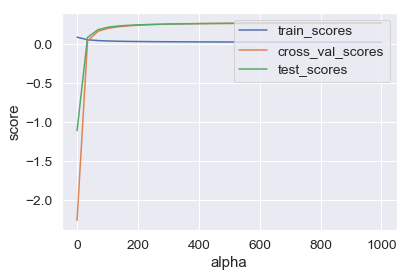

In [80]:
plt.plot(alphas, train_scores, label = 'train_scores')
plt.plot(alphas, cross_val_scores, label = 'cross_val_scores')
plt.plot(alphas, test_scores, label = 'test_scores')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc = 'upper right');